In [85]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

from tqdm.auto import tqdm

from termcolor import colored

from constants import *

In [86]:
with open("relation2id.pkl", "rb") as f:
    relation2id = pickle.load(f)

id2relation = {}
for rel in relation2id.keys():
    id2relation[relation2id[rel]] = rel

In [87]:
full_pred_df = None

for filename in tqdm(os.listdir(PREDICTIONS_PATH)):
                    
    with open(os.path.join(PREDICTIONS_PATH, filename), "r") as f:
        pred_df = pd.read_csv(f).drop("Unnamed: 0", axis=1)
    
    if full_pred_df is None:
        full_pred_df = pred_df.copy()
    
    else:
        full_pred_df = pd.concat([full_pred_df, pred_df])

  0%|          | 0/701 [00:00<?, ?it/s]

In [88]:
full_pred_df.reset_index(drop=True, inplace=True)

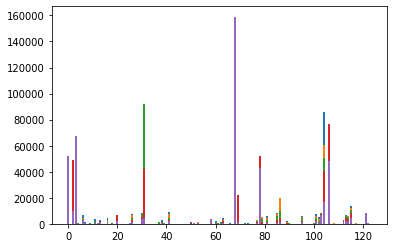

In [89]:
plt.bar(full_pred_df["Guess 1"].value_counts().index, full_pred_df["Guess 1"].value_counts().values)
plt.bar(full_pred_df["Guess 2"].value_counts().index, full_pred_df["Guess 2"].value_counts().values)
plt.bar(full_pred_df["Guess 3"].value_counts().index, full_pred_df["Guess 3"].value_counts().values)
plt.bar(full_pred_df["Guess 4"].value_counts().index, full_pred_df["Guess 4"].value_counts().values)
plt.bar(full_pred_df["Guess 5"].value_counts().index, full_pred_df["Guess 5"].value_counts().values)

plt.show()

In [90]:
full_pred_df["Annotation"] = [np.nan] * len(full_pred_df)

In [95]:
full_pred_df

,Sentence,Guess 1,Guess 2,Guess 3,Guess 4,Guess 5,Annotation
0,[CLS] Significant leaks are <e1>life-threateni...,104,31,68,78,106,104.0
1,[CLS] <e1>vacuum-assiste closure device</e1> ...,2,18,113,115,121,NaN
2,[CLS] <e1>vacuum-assiste closure device</e1> ...,78,103,115,121,113,103.0
3,[CLS] Vacuum-assisted closure devices have bee...,30,78,115,121,6,NaN
4,[CLS] Vacuum-assisted closure devices have bee...,86,115,13,121,6,NaN
...,...,...,...,...,...,...,...
457290,[CLS] <e1>postoperative complicatio</e1><e2>y...,69,41,0,78,3,NaN
457291,[CLS] <e1>postoperative complicatio</e1><e2>p...,104,68,113,103,78,NaN
457292,[CLS] <e1>anastomotic pseudoaneurysm</e1><e2>...,30,106,0,78,3,NaN
457293,[CLS] <e1>anastomotic pseudoaneurysm</e1><e2>...,30,106,0,78,3,NaN


In [94]:
for r in full_pred_df.iterrows():
    sentence = r[1]["Sentence"][6: -6]
    sentence = re.sub(r"<e1>(.+)</e1>", colored(r"\1", "red"), sentence)
    sentence = re.sub(r"<e2>(.+)</e2>", colored(r"\1", "blue"), sentence)

    guesses_id = [r[1]["Guess 1"], r[1]["Guess 2"], r[1]["Guess 3"], r[1]["Guess 4"], r[1]["Guess 5"]]
    guesses_type = [id2relation[g] for g in guesses_id]
    
    print(sentence)
    for i in range(len(guesses_type)):
        print(f"{i + 1}. {guesses_type[i]}")
    
    print("Choice ?")
    guess = ""
    while guess not in ["0", "1", "2", "3", "4", "5"]:
        guess = input()
        if guess not in ["0", "1", "2", "3", "4", "5"]:
            print("Please enter an integer between 0 and 5!")
    
    guess = int(guess) - 1
    if guess >= 0 and guess <= 4:
        full_pred_df.at[r[0], "Annotation"] = int(guesses_id[guess])

Significant leaks are life-threatening event and may lead to a permanent stoma 
1. may_treat
2. disease_has_associated_anatomic_site
3. has_nichd_parent
4. is_associated_anatomic_site_of
5. nichd_parent_of
Choice ?
1
 vacuum-assiste closure device have been shown to accelerate wound healing by increasing local blood flow, reducing bacterial load, and stimulating growth of granulation tissue
1. anatomic_structure_has_location
2. chemical_or_drug_initiates_biological_process
3. procedure_has_partially_excised_anatomy
4. process_includes_biological_process
5. target_anatomy_has_procedure
Choice ?
0
 vacuum-assiste closure device have been shown to accelerate wound healing by increasing local blood flow, reducing bacterial load , and stimulating growth of granulation tissue
1. is_associated_anatomic_site_of
2. may_prevent
3. process_includes_biological_process
4. target_anatomy_has_procedure
5. procedure_has_partially_excised_anatomy
Choice ?
2
Vacuum-assisted closure devices have been sho

KeyboardInterrupt: Interrupted by user